# **Task 3: Pre-trained models: images**

In [15]:
# necessary imports
import os
import numpy
import pandas
import random
import trimesh
import logging
import tensorflow
from PIL import Image
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import models, layers, regularizers, optimizers, Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Dropout, BatchNormalization

# import Stratified K-Fold Cross Validation notebook
%run KFold-Cross-Validation.ipynb

# dataset root path
DATASET_ROOT = '/run/media/rr/M2/DevOps/jupyter-lab/CIDL/dataset/'

# final preprocessed dataset directory path
DATASET_PATH = os.path.join(DATASET_ROOT, 'Preprocessed')

# number of classes for the classification task
NUM_CLASSES = 5

In [16]:
# only log critical messages
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

## Input Target Size

In [17]:
# loop through images, load and store size
images_sizes = []
for image_filename in images_X['filename']:
    if image_filename != 'filename':
        image = Image.open(image_filename)
        images_sizes.append(image.size)

# convert to np array
images_sizes = numpy.array(images_sizes)

# print statistics
print("Loaded images: " + str(len(images_sizes)))
print("Average size: " + str(numpy.average(images_sizes, axis=0)))

Loaded images: 55086
Average size: [512. 512.]


In [18]:
# target size
TARGET_SIZE = (128, 128)

## **VGG16**

### **Feature Extraction**

### Experiment 0: Plain convolutional base

Found 1500 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 11250 validated image filenames belonging to 5 classes.
Found 2250 validated image filenames belonging to 5 classes.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 128, 128, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 128, 128, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 819

2022-02-11 10:01:42.811624: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


 1/88 [..............................] - ETA: 5:28 - loss: 3.7028 - accuracy: 0.2188

2022-02-11 10:01:44.968095: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


88/88 [==============================] - ETA: 0s - loss: 13.4833 - accuracy: 0.2368
Epoch 00001: val_loss improved from inf to 9.00865, saving model to saved_models/images/Experiment-11/Experiment-11-fold-1.h5
88/88 [==============================] - 65s 704ms/step - loss: 13.4833 - accuracy: 0.2368 - val_loss: 9.0087 - val_accuracy: 0.2422
Epoch 2/400
88/88 [==============================] - ETA: 0s - loss: 7.8163 - accuracy: 0.2833
Epoch 00002: val_loss improved from 9.00865 to 6.73341, saving model to saved_models/images/Experiment-11/Experiment-11-fold-1.h5
88/88 [==============================] - 60s 679ms/step - loss: 7.8163 - accuracy: 0.2833 - val_loss: 6.7334 - val_accuracy: 0.3840
Epoch 3/400
88/88 [==============================] - ETA: 0s - loss: 5.4966 - accuracy: 0.3099
Epoch 00003: val_loss improved from 6.73341 to 2.76696, saving model to saved_models/images/Experiment-11/Experiment-11-fold-1.h5
88/88 [==============================] - 60s 678ms/step - loss: 5.4966 - ac

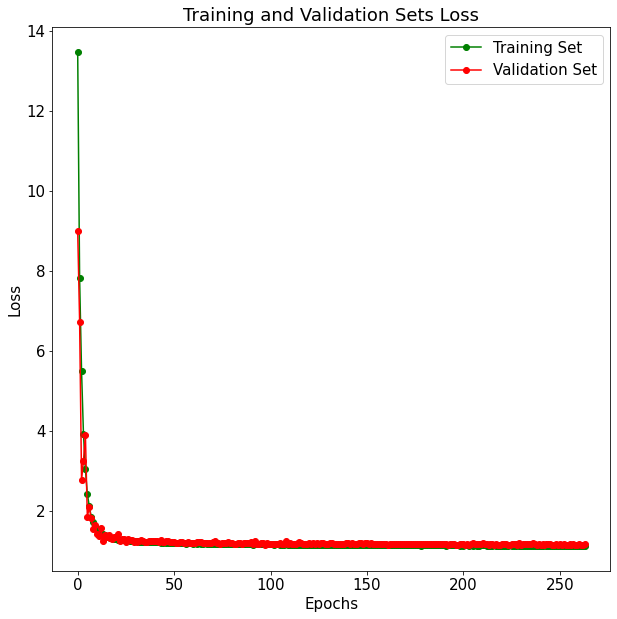

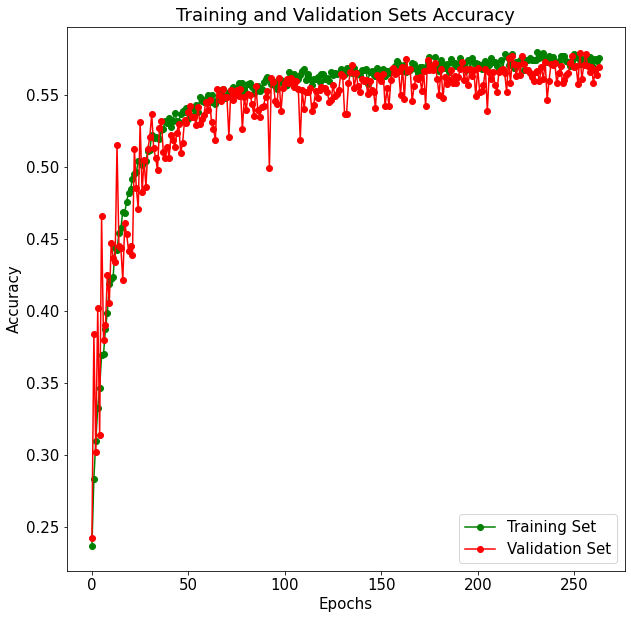

12/12 [==============================] - 8s 663ms/step - loss: 1.1554 - accuracy: 0.5840
Best model Test Loss: 1.1553860902786255
Best model Test Accuracy: 0.5839999914169312
Confusion Matrix
Normalized confusion matrix


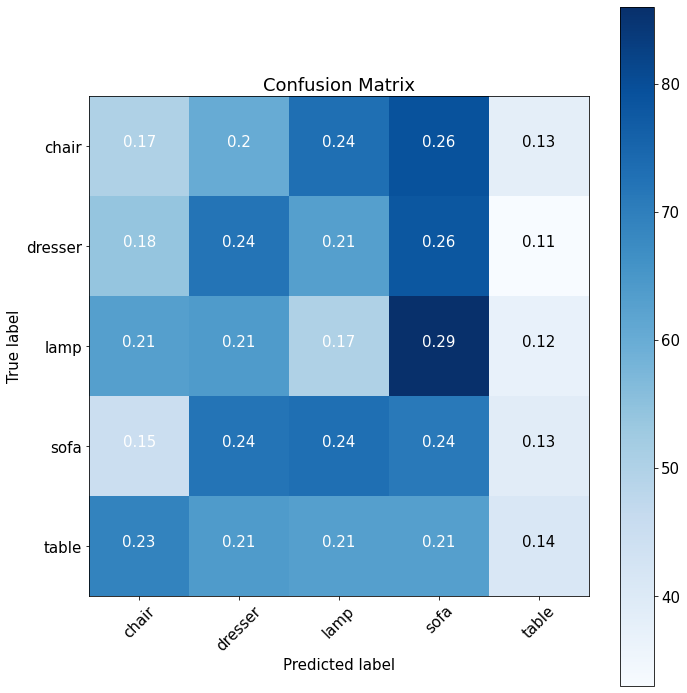

Classification Report
              precision    recall  f1-score   support

       chair       0.18      0.17      0.17       300
     dresser       0.22      0.24      0.23       300
        lamp       0.16      0.17      0.16       300
        sofa       0.19      0.24      0.21       300
       table       0.22      0.14      0.17       300

    accuracy                           0.19      1500
   macro avg       0.19      0.19      0.19      1500
weighted avg       0.19      0.19      0.19      1500


-------- TERMINATED FOLD: 1 --------


In [14]:
# define convolutional base
vgg16_conv_base = vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(128, 128, 3))

# freeze convolutional base
vgg16_conv_base.trainable = False

# define model with classifier
inputs = Input(shape=(128, 128, 3))
x = vgg16.preprocess_input(inputs)
x = vgg16_conv_base(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(NUM_CLASSES, activation="softmax")(x)
model = Model(inputs, outputs)

# train, validate and test
images_kfold_validation_model(model_name="Experiment-10", n_splits=6, test_size=0.10,
                        shuffle=True, model=model, learning_rate=0.001,
                        decay=0.001, target_size=TARGET_SIZE, epochs=400,
                        batch_size=128, one_fold=True, resample_data=3000, augment=True)

### Experiment 1: No custom preprocessing

Found 1500 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 11250 validated image filenames belonging to 5 classes.
Found 2250 validated image filenames belonging to 5 classes.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 128, 128, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 128, 128, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 819

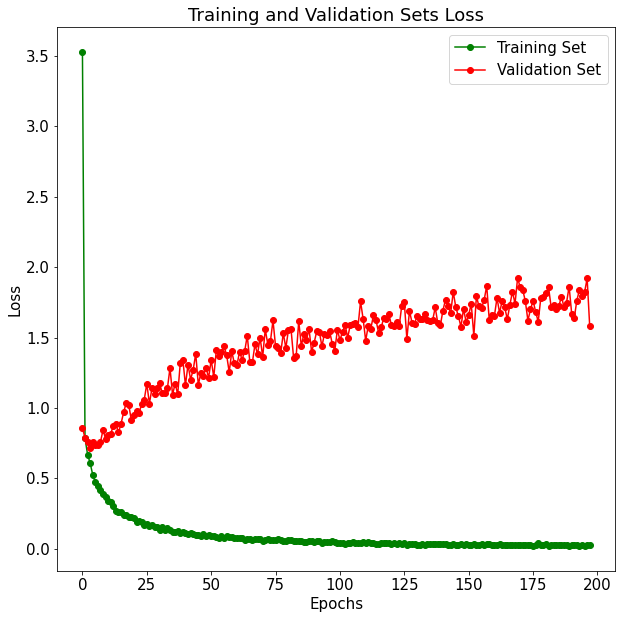

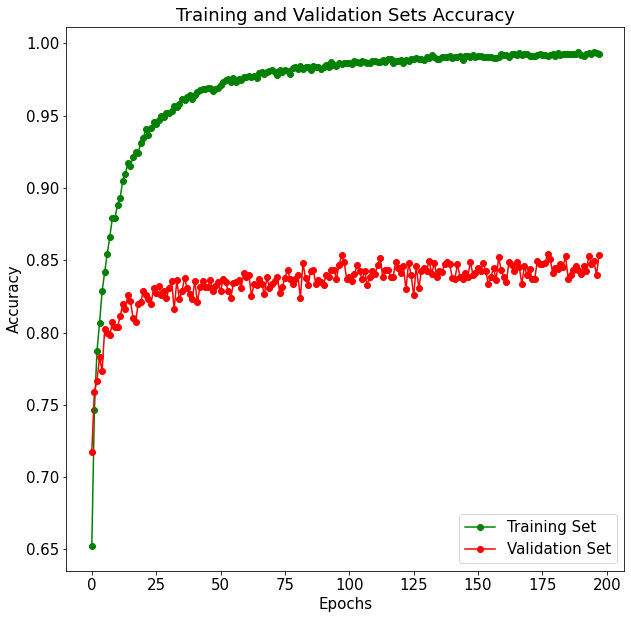

12/12 [==============================] - 7s 561ms/step - loss: 0.7805 - accuracy: 0.7740
Best model Test Loss: 0.7804885506629944
Best model Test Accuracy: 0.7739999890327454
Confusion Matrix
Normalized confusion matrix


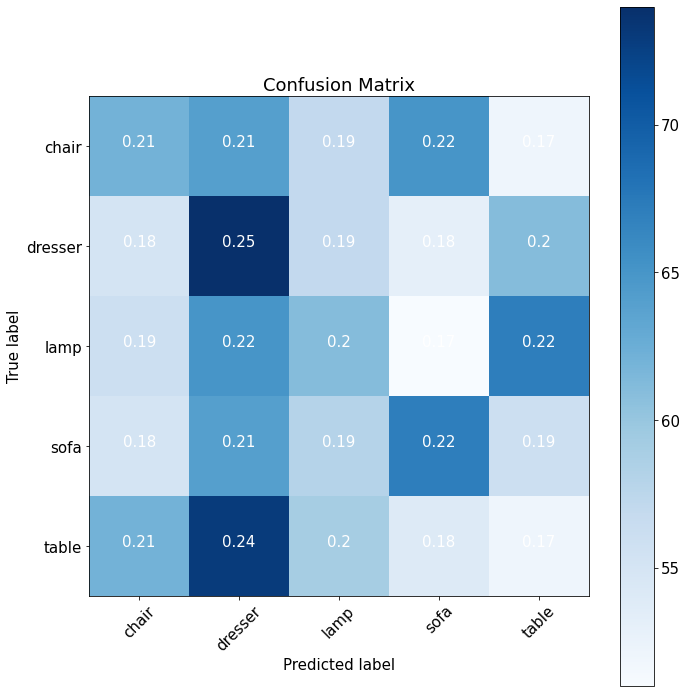

Classification Report
              precision    recall  f1-score   support

       chair       0.21      0.21      0.21       300
     dresser       0.22      0.25      0.23       300
        lamp       0.21      0.20      0.21       300
        sofa       0.23      0.22      0.23       300
       table       0.18      0.17      0.18       300

    accuracy                           0.21      1500
   macro avg       0.21      0.21      0.21      1500
weighted avg       0.21      0.21      0.21      1500


-------- TERMINATED FOLD: 1 --------


In [6]:
# define convolutional base
vgg16_conv_base = vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(128, 128, 3))

# freeze convolutional base
vgg16_conv_base.trainable = False

# define model with classifier
inputs = Input(shape=(128, 128, 3))
x = vgg16.preprocess_input(inputs)
x = vgg16_conv_base(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(NUM_CLASSES, activation="softmax")(x)
model = Model(inputs, outputs)

# train, validate and test
images_kfold_validation_model(model_name="Experiment-11", n_splits=6, test_size=0.10,
                        shuffle=True, model=model, learning_rate=0.001,
                        decay=0.001, target_size=TARGET_SIZE, epochs=400,
                        batch_size=128, one_fold=True, resample_data=3000, augment=True)

### Experiment 2: Dropout

##### Early stopping was set to `min_delta=0.001, patience=50`.

2022-02-11 20:15:23.678633: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-11 20:15:23.697209: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-11 20:15:23.697330: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-11 20:15:23.697622: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Found 1500 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 11250 validated image filenames belonging to 5 classes.
Found 2250 validated image filenames belonging to 5 classes.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 128, 128, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 128, 128, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 819

2022-02-11 20:15:26.526822: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


 1/88 [..............................] - ETA: 4:58 - loss: 24.3998 - accuracy: 0.1484

2022-02-11 20:15:28.521556: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


88/88 [==============================] - ETA: 0s - loss: 4.4224 - accuracy: 0.5941
Epoch 00001: val_loss improved from inf to 1.05988, saving model to saved_models/images/Experiment-13/Experiment-13-fold-1.h5
88/88 [==============================] - 64s 696ms/step - loss: 4.4224 - accuracy: 0.5941 - val_loss: 1.0599 - val_accuracy: 0.6773
Epoch 2/400
88/88 [==============================] - ETA: 0s - loss: 1.0925 - accuracy: 0.6678
Epoch 00002: val_loss did not improve from 1.05988
88/88 [==============================] - 59s 675ms/step - loss: 1.0925 - accuracy: 0.6678 - val_loss: 1.0658 - val_accuracy: 0.7138
Epoch 3/400
88/88 [==============================] - ETA: 0s - loss: 0.9899 - accuracy: 0.7026
Epoch 00003: val_loss improved from 1.05988 to 0.87465, saving model to saved_models/images/Experiment-13/Experiment-13-fold-1.h5
88/88 [==============================] - 59s 670ms/step - loss: 0.9899 - accuracy: 0.7026 - val_loss: 0.8747 - val_accuracy: 0.7489
Epoch 4/400
88/88 [=====

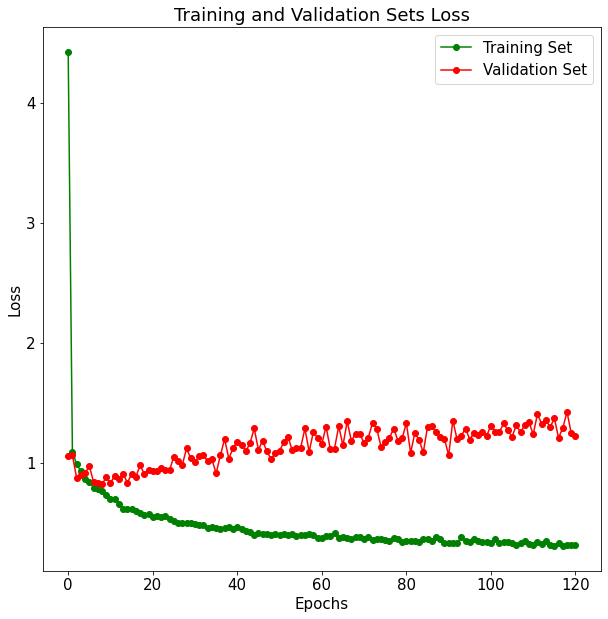

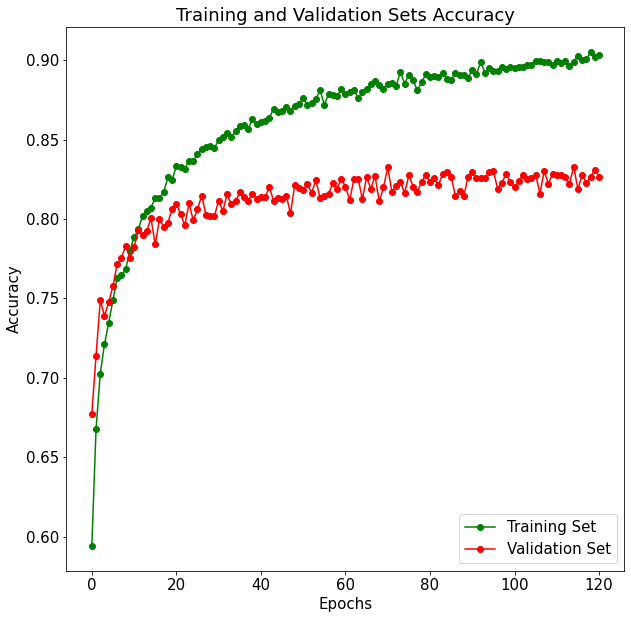

12/12 [==============================] - 8s 669ms/step - loss: 0.7710 - accuracy: 0.7787
Best model Test Loss: 0.7710278034210205
Best model Test Accuracy: 0.7786666750907898
Confusion Matrix
Normalized confusion matrix


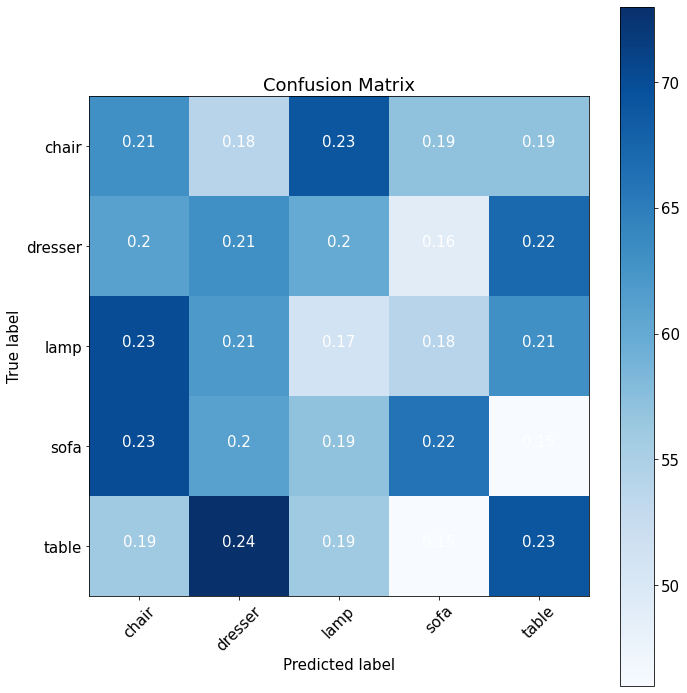

Classification Report
              precision    recall  f1-score   support

       chair       0.20      0.21      0.20       300
     dresser       0.20      0.21      0.21       300
        lamp       0.17      0.17      0.17       300
        sofa       0.24      0.22      0.23       300
       table       0.23      0.23      0.23       300

    accuracy                           0.21      1500
   macro avg       0.21      0.21      0.21      1500
weighted avg       0.21      0.21      0.21      1500


-------- TERMINATED FOLD: 1 --------


In [5]:
# define convolutional base
vgg16_conv_base = vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(128, 128, 3))

# freeze convolutional base
vgg16_conv_base.trainable = False

# define model with classifier
inputs = Input(shape=(128, 128, 3))
x = vgg16.preprocess_input(inputs)
x = vgg16_conv_base(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(NUM_CLASSES, activation="softmax")(x)
model = Model(inputs, outputs)

# train, validate and test
images_kfold_validation_model(model_name="Experiment-12", n_splits=6, test_size=0.10,
                        shuffle=True, model=model, learning_rate=0.001,
                        decay=0.001, target_size=TARGET_SIZE, epochs=400,
                        batch_size=128, one_fold=True, resample_data=3000, augment=True)

### Experiment 3: Smaller Dense Layer

In [ ]:
# define convolutional base
vgg16_conv_base = vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(128, 128, 3))

# freeze convolutional base
vgg16_conv_base.trainable = False

# define model with classifier
inputs = Input(shape=(128, 128, 3))
x = vgg16.preprocess_input(inputs)
x = vgg16_conv_base(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(NUM_CLASSES, activation="softmax")(x)
model = Model(inputs, outputs)

# train, validate and test
images_kfold_validation_model(model_name="Experiment-13", n_splits=6, test_size=0.10,
                        shuffle=True, model=model, learning_rate=0.001,
                        decay=0.001, target_size=TARGET_SIZE, epochs=400,
                        batch_size=128, one_fold=True, resample_data=3000, augment=True)

### **Fine Tuning**

Found 50 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 375 validated image filenames belonging to 5 classes.
Found 75 validated image filenames belonging to 5 classes.
Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 tf.__operators__.getitem_14  (None, 128, 128, 3)      0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_14 (TFOpLamb  (None, 128, 128, 3)      0         
 da)                                                             
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                          

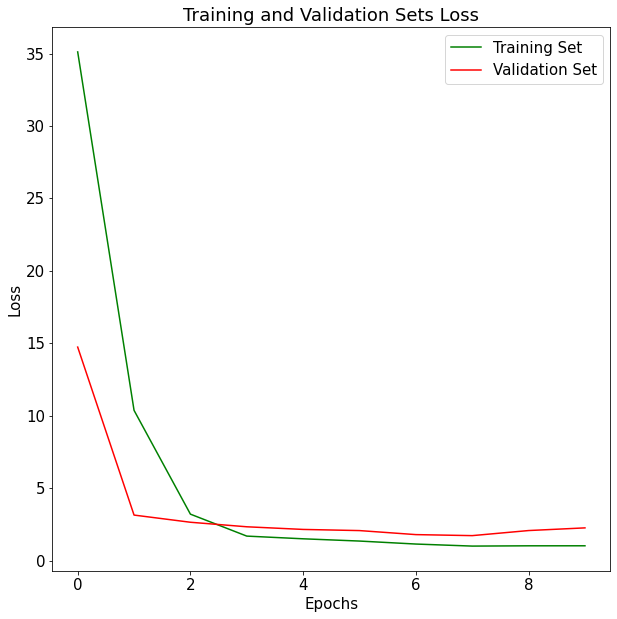

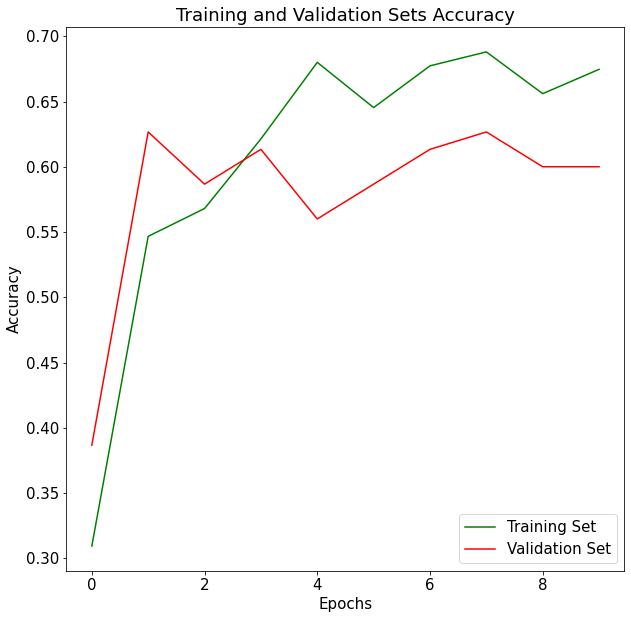


-------- TERMINATED FOLD: 1 --------
Found 50 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 375 validated image filenames belonging to 5 classes.
Found 75 validated image filenames belonging to 5 classes.
Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 tf.__operators__.getitem_14  (None, 128, 128, 3)      0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_14 (TFOpLamb  (None, 128, 128, 3)      0         
 da)                                                             
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
    

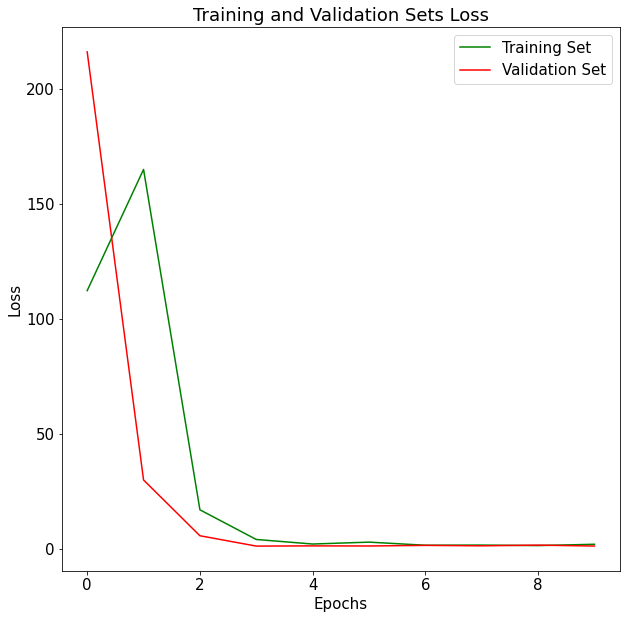

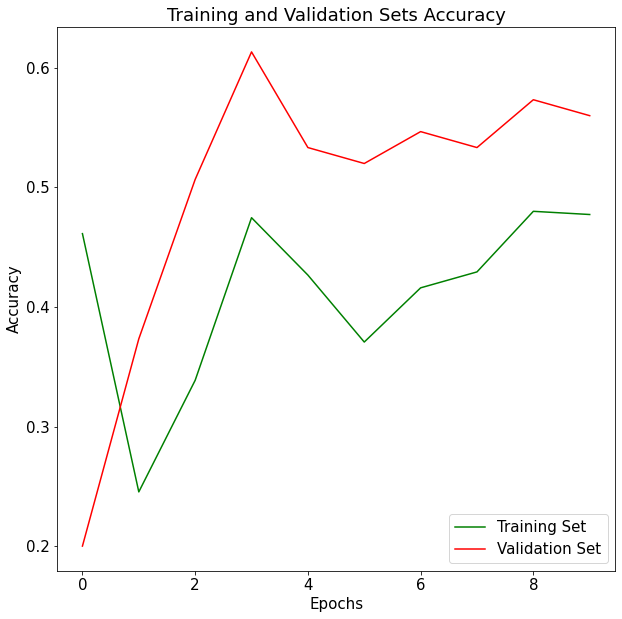


-------- TERMINATED FOLD: 1 --------
Found 50 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 375 validated image filenames belonging to 5 classes.
Found 75 validated image filenames belonging to 5 classes.
Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 tf.__operators__.getitem_14  (None, 128, 128, 3)      0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_14 (TFOpLamb  (None, 128, 128, 3)      0         
 da)                                                             
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
    

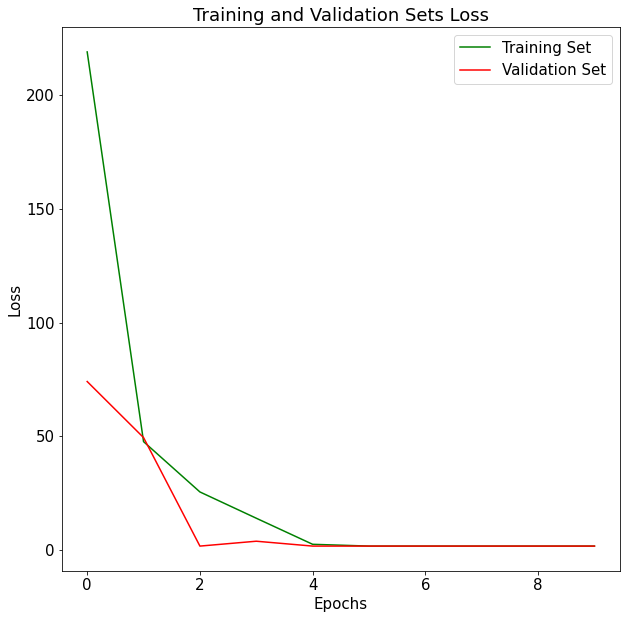

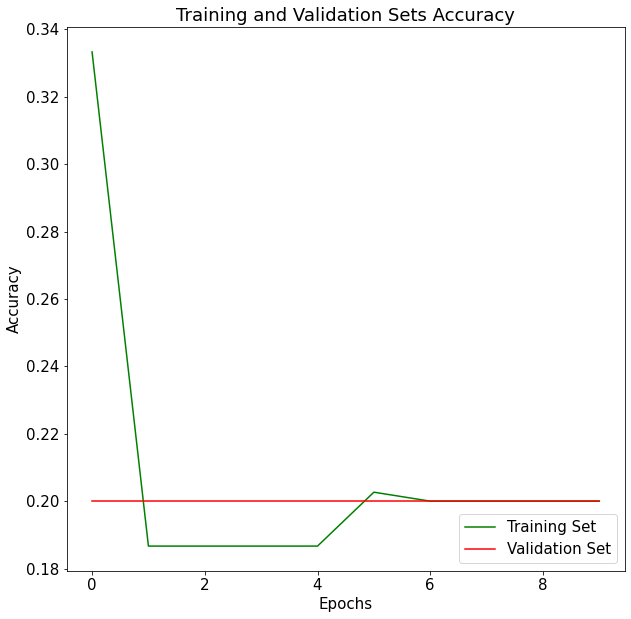


-------- TERMINATED FOLD: 1 --------


In [21]:
# Training parameters
epochs = 10
n_splits = 6
decay = 0.001
shuffle = True
test_size = 0.10
batch_size = 128
resample_data = 100
learning_rate = 0.001
target_size = TARGET_SIZE

# define convolutional base
vgg16_conv_base = vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(128, 128, 3))

# freeze convolutional base
vgg16_conv_base.trainable = False

# define model with classifier
inputs = Input(shape=(128, 128, 3))
x = vgg16.preprocess_input(inputs)
x = vgg16_conv_base(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(NUM_CLASSES, activation="softmax")(x)
model = Model(inputs, outputs)

### train classifier ###
model_name = "Experiment-14-1"
fold_counter = 1

# resample images dataset
images_data = images_data.groupby('class_label', group_keys=False).apply(lambda x: x.sample(min(len(x), resample_data)))
images_X = images_data[['filename']]
images_Y = images_data[['class_label']]

# split train and test dataset
images_train, images_test = train_test_split(images_data, test_size=test_size, stratify=images_Y)
images_train_X = images_train[['filename']]
images_train_Y = images_train[['class_label']]

# define stratified k fold cross validation parameters
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=shuffle)

# define image data generator with data augmentation
train_image_data_generator = ImageDataGenerator(rotation_range=40, width_shift_range=0.01,
                                          height_shift_range=0.01, horizontal_flip=True,
                                          shear_range=20.0, fill_mode='nearest')

# test split
test_image_data_generator = ImageDataGenerator()
test_data_generator  = test_image_data_generator.flow_from_dataframe(images_test, directory=None,
                                                x_col="filename", y_col="class_label",
                                                class_mode="categorical", shuffle=shuffle,
                                                target_size=target_size, batch_size=batch_size)

# generate training and validation folds
for train_index, validation_index in stratified_kfold.split(images_train_X, images_train_Y):
    print("\n-------- STARTING FOLD: " + str(fold_counter) + " --------")

    # best model save path
    if not os.path.isdir(os.path.join(images_models_save_dir, model_name)):
        os.mkdir(os.path.join(images_models_save_dir, model_name))
    images_model_save_path = os.path.join(images_models_save_dir, model_name, get_model_name(model_name, fold_counter))

    # training and test folds indices
    training_data = images_train.iloc[train_index]
    validation_data = images_train.iloc[validation_index]
    train_data_generator = train_image_data_generator.flow_from_dataframe(training_data, directory=None,
                                                                    x_col="filename", y_col="class_label",
                                                                    class_mode="categorical", shuffle=shuffle,
                                                                    target_size=target_size, batch_size=batch_size)
    validation_image_data_generator = ImageDataGenerator()
    validation_data_generator = validation_image_data_generator.flow_from_dataframe(validation_data, directory=None,
                                                                    x_col="filename", y_col="class_label",
                                                                    class_mode="categorical", shuffle=shuffle,
                                                                    target_size=target_size, batch_size=batch_size)

    # create best model checkpoint
    best_model_checkpoint = tensorflow.keras.callbacks.ModelCheckpoint(images_model_save_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)
    val_accuracy_early_stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.001, patience=100, verbose=1)
    callbacks_list = [best_model_checkpoint, val_accuracy_early_stopping]

    # compile model
    model.summary()
    model.compile(tensorflow.keras.optimizers.RMSprop(learning_rate=learning_rate, decay=decay), loss="categorical_crossentropy", metrics=["accuracy"])

    # train model
    history = model.fit(train_data_generator,
                        epochs=epochs,
                        callbacks=callbacks_list,
                        validation_data=validation_data_generator)

    # plot loss and acuracy for each training/validation fold
    plot_train_loss_accuracy(images_model_save_path, history.history["loss"], history.history["accuracy"],
                             history.history["val_loss"], history.history["val_accuracy"])

    print("\n-------- TERMINATED FOLD: " + str(fold_counter) + " --------")

    # if one fold execution was requested, terminate here
    break

# unfreeze convolutional base
vgg16_conv_base.trainable = True

# freeze/unfreeze layer by layer
for vgg16_layer in vgg16_conv_base.layers:
    if vgg16_layer.name == 'block5_conv3':
        vgg16_layer.trainable = True
    else:
        vgg16_layer.trainable = False

# train, validate and test
model_name = "Experiment-14-2"
fold_counter = 1

# resample images dataset
images_data = images_data.groupby('class_label', group_keys=False).apply(lambda x: x.sample(min(len(x), resample_data)))
images_X = images_data[['filename']]
images_Y = images_data[['class_label']]

# split train and test dataset
images_train, images_test = train_test_split(images_data, test_size=test_size, stratify=images_Y)
images_train_X = images_train[['filename']]
images_train_Y = images_train[['class_label']]

# define stratified k fold cross validation parameters
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=shuffle)

# define image data generator with data augmentation
train_image_data_generator = ImageDataGenerator(rotation_range=40, width_shift_range=0.01,
                                          height_shift_range=0.01, horizontal_flip=True,
                                          shear_range=20.0, fill_mode='nearest')

# test split
test_image_data_generator = ImageDataGenerator()
test_data_generator  = test_image_data_generator.flow_from_dataframe(images_test, directory=None,
                                                x_col="filename", y_col="class_label",
                                                class_mode="categorical", shuffle=shuffle,
                                                target_size=target_size, batch_size=batch_size)

# generate training and validation folds
for train_index, validation_index in stratified_kfold.split(images_train_X, images_train_Y):
    print("\n-------- STARTING FOLD: " + str(fold_counter) + " --------")

    # best model save path
    if not os.path.isdir(os.path.join(images_models_save_dir, model_name)):
        os.mkdir(os.path.join(images_models_save_dir, model_name))
    images_model_save_path = os.path.join(images_models_save_dir, model_name, get_model_name(model_name, fold_counter))

    # training and test folds indices
    training_data = images_train.iloc[train_index]
    validation_data = images_train.iloc[validation_index]
    train_data_generator = train_image_data_generator.flow_from_dataframe(training_data, directory=None,
                                                                    x_col="filename", y_col="class_label",
                                                                    class_mode="categorical", shuffle=shuffle,
                                                                    target_size=target_size, batch_size=batch_size)
    validation_image_data_generator = ImageDataGenerator()
    validation_data_generator = validation_image_data_generator.flow_from_dataframe(validation_data, directory=None,
                                                                    x_col="filename", y_col="class_label",
                                                                    class_mode="categorical", shuffle=shuffle,
                                                                    target_size=target_size, batch_size=batch_size)

    # create best model checkpoint
    best_model_checkpoint = tensorflow.keras.callbacks.ModelCheckpoint(images_model_save_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)
    val_accuracy_early_stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.001, patience=100, verbose=1)
    callbacks_list = [best_model_checkpoint, val_accuracy_early_stopping]

    # compile model
    model.summary()
    model.compile(tensorflow.keras.optimizers.RMSprop(learning_rate=learning_rate, decay=decay), loss="categorical_crossentropy", metrics=["accuracy"])

    # train model
    history = model.fit(train_data_generator,
                        epochs=epochs,
                        callbacks=callbacks_list,
                        validation_data=validation_data_generator)

    # plot loss and acuracy for each training/validation fold
    plot_train_loss_accuracy(images_model_save_path, history.history["loss"], history.history["accuracy"],
                             history.history["val_loss"], history.history["val_accuracy"])

    print("\n-------- TERMINATED FOLD: " + str(fold_counter) + " --------")

    # if one fold execution was requested, terminate here
    break

# freeze/unfreeze layer by layer
for vgg16_layer in vgg16_conv_base.layers:
    if vgg16_layer.name == 'block5_conv2':
        vgg16_layer.trainable = True

# train, validate and test
model_name = "Experiment-14-3"
fold_counter = 1

# resample images dataset
images_data = images_data.groupby('class_label', group_keys=False).apply(lambda x: x.sample(min(len(x), resample_data)))
images_X = images_data[['filename']]
images_Y = images_data[['class_label']]

# split train and test dataset
images_train, images_test = train_test_split(images_data, test_size=test_size, stratify=images_Y)
images_train_X = images_train[['filename']]
images_train_Y = images_train[['class_label']]

# define stratified k fold cross validation parameters
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=shuffle)

# define image data generator with data augmentation
train_image_data_generator = ImageDataGenerator(rotation_range=40, width_shift_range=0.01,
                                          height_shift_range=0.01, horizontal_flip=True,
                                          shear_range=20.0, fill_mode='nearest')

# test split
test_image_data_generator = ImageDataGenerator()
test_data_generator  = test_image_data_generator.flow_from_dataframe(images_test, directory=None,
                                                x_col="filename", y_col="class_label",
                                                class_mode="categorical", shuffle=shuffle,
                                                target_size=target_size, batch_size=batch_size)

# generate training and validation folds
for train_index, validation_index in stratified_kfold.split(images_train_X, images_train_Y):
    print("\n-------- STARTING FOLD: " + str(fold_counter) + " --------")

    # best model save path
    if not os.path.isdir(os.path.join(images_models_save_dir, model_name)):
        os.mkdir(os.path.join(images_models_save_dir, model_name))
    images_model_save_path = os.path.join(images_models_save_dir, model_name, get_model_name(model_name, fold_counter))

    # training and test folds indices
    training_data = images_train.iloc[train_index]
    validation_data = images_train.iloc[validation_index]
    train_data_generator = train_image_data_generator.flow_from_dataframe(training_data, directory=None,
                                                                    x_col="filename", y_col="class_label",
                                                                    class_mode="categorical", shuffle=shuffle,
                                                                    target_size=target_size, batch_size=batch_size)
    validation_image_data_generator = ImageDataGenerator()
    validation_data_generator = validation_image_data_generator.flow_from_dataframe(validation_data, directory=None,
                                                                    x_col="filename", y_col="class_label",
                                                                 fold_counter   class_mode="categorical", shuffle=shuffle,
                                                                    target_size=target_size, batch_size=batch_size)

    # create best model checkpoint
    best_model_checkpoint = tensorflow.keras.callbacks.ModelCheckpoint(images_model_save_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)
    val_accuracy_early_stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.001, patience=100, verbose=1)
    callbacks_list = [best_model_checkpoint, val_accuracy_early_stopping]

    # compile model
    model.summary()
    model.compile(tensorflow.keras.optimizers.RMSprop(learning_rate=learning_rate, decay=decay), loss="categorical_crossentropy", metrics=["accuracy"])

    # train model
    history = model.fit(train_data_generator,
                        epochs=epochs,
                        callbacks=callbacks_list,
                        validation_data=validation_data_generator)

    # plot loss and acuracy for each training/validation fold
    plot_train_loss_accuracy(images_model_save_path, history.history["loss"], history.history["accuracy"],
                             history.history["val_loss"], history.history["val_accuracy"])

    print("\n-------- TERMINATED FOLD: " + str(fold_counter) + " --------")

    # if one fold execution was requested, terminate here
    break